In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn import datasets
import os

#linear regression=scikit learn/linear regression,lm
#logistic regression=scikit learn/LogisticRegression, glm
#cluster=scikit learn/KMeans, xxx

In [2]:
#Loading the iris dataset
iris = datasets.load_iris()

#Checking the dataset
iris.data

#Checking the featues
iris.feature_names

#Scaling the data for clustering for better efficiency
x = scale(iris.data)

#checking the target
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
# Doing the clustering 
clustering = KMeans(n_clusters =3,random_state=1) #u can change the number of clusters based on elbow methos or silhoutte

#Fitting the algorithm
clustering.fit(x)

KMeans(n_clusters=3, random_state=1)

In [4]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Text(0.5, 1.0, 'The actual dataset')

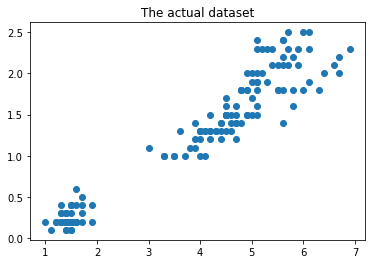

In [5]:
#Adding the visualisation
import matplotlib.pyplot as plt
%matplotlib inline

#Converting into DataFrame
iris_df = pd.DataFrame(iris.data)

iris_df.columns=['sepal_length','sepal_width','petal_length','petal_width']

y=pd.DataFrame(iris.target)
y.columns=['targets']

y.head()

plt.scatter(x=iris_df.petal_length,y=iris_df.petal_width)
plt.title("The actual dataset")

Text(0.5, 1.0, 'The actual dataset')

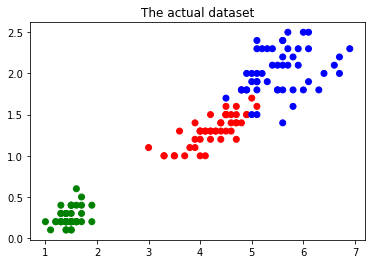

In [6]:
import numpy as np
color =np.array(['green','red','blue'])

#adding the colors
plt.scatter(x=iris_df.petal_length,y=iris_df.petal_width,c=color[iris.target])
plt.title("The actual dataset")

Text(0.5, 1.0, 'The dataset post clustering')

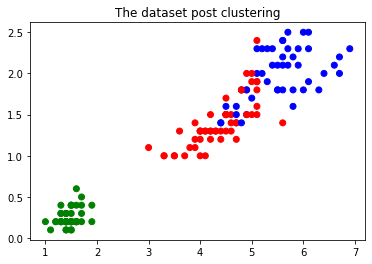

In [7]:
#After the clustering
#adding the colors
color2=np.array(['green','red','blue'])
plt.scatter(x=iris_df.petal_length,y=iris_df.petal_width,c=color2[clustering.labels_])
plt.title("The dataset post clustering")

In [8]:
#finding distortion for every k- value

# K = 1 to 10,for every k value we calculate distortion,then we plot the line graph between K and Distortion
distortions = []
K = range(1,18)
print(K)

range(1, 18)


In [9]:
#Choosing the Appropriate Number of Clusters
#1 elbow method
kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

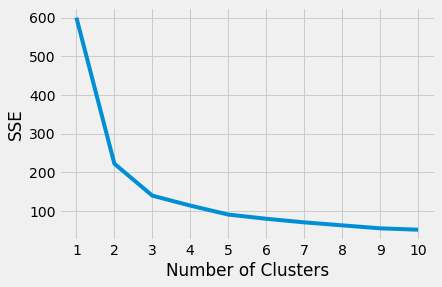

In [10]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [11]:
from kneed import KneeLocator
kl = KneeLocator(
        range(1, 11), sse, curve="convex", direction="decreasing"
    )
kl.elbow

3